In [137]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None

myname = 'ŁukaszKochańczyk'
print(f'Do analizy mam zbiór nr: {len(myname) % 16}')

Do analizy mam zbiór nr: 0


#### Uporządkowanie danych z marką odkurzaczy:

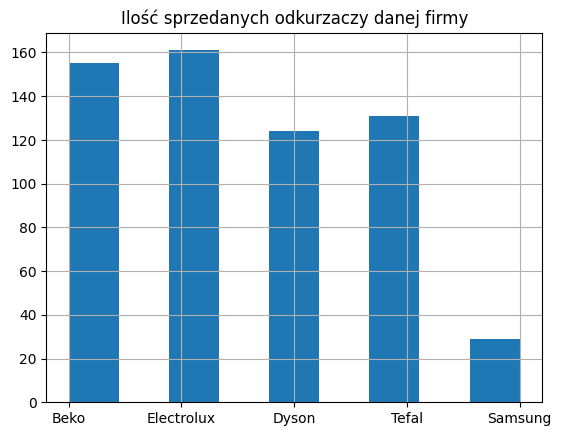

In [138]:
df = pd.read_csv('../Original Data/0_DOLNOSLASKIE.csv')

ax_mark = df.Marka.hist(bins=9)
plt.title('Ilość sprzedanych odkurzaczy danej firmy')
plt.show()
fig = ax_mark.get_figure()
fig.savefig('../Analysis Data/Wykres_marki.png')

#### Uporządkowanie danych z ocenami wystawionymi przez klientów:

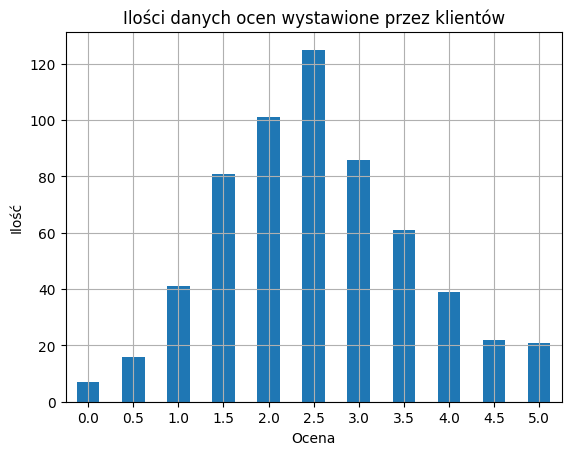

In [139]:
df_rating = df.filter(['Ocena']).groupby('Ocena').size()

plot_rating = df_rating.plot.bar(title='Ilości danych ocen wystawione przez klientów',
 rot=0, xlabel='Ocena', ylabel='Ilość', grid=True)
 
fig = plot_rating.get_figure()
fig.savefig('../Analysis Data/Wykres_ocen.png')

#### Uporządkowanie danych z dniami od zakupu odkurzacza:

Minimalna ilość dni od zakupu: 0
Maksymalna ilość dni od zakupu: 16


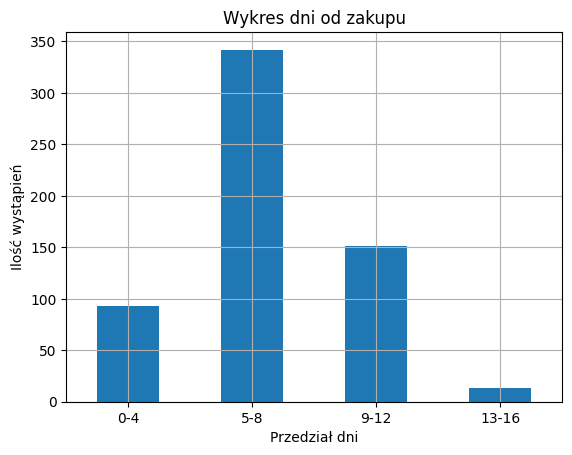

In [140]:
df_days = df['Dni od zakupu']

print(f'Minimalna ilość dni od zakupu: {min(df_days)}')
print(f'Maksymalna ilość dni od zakupu: {max(df_days)}')

df_days['Przedział dni'] = pd.cut(df_days, [0, 4, 8, 12, 16],
 labels=['0-4', '5-8', '9-12', '13-16'])

df_dayss = df_days['Przedział dni'].to_frame()
df_dayss = df_days.groupby('Przedział dni').size()

plot_days = df_dayss.plot.bar(title='Wykres dni od zakupu',
 rot=0, xlabel='Przedział dni', ylabel='Ilość wystąpień', grid=True)

fig = plot_days.get_figure()
fig.savefig('../Analysis Data/Wykres_dni_od_zakupu.png')

#### Uporządkowanie danych z wiekiem kupujących:

Minimalny wiek kupującego 19.0
Maksymalny wiek kupującegp 72.0


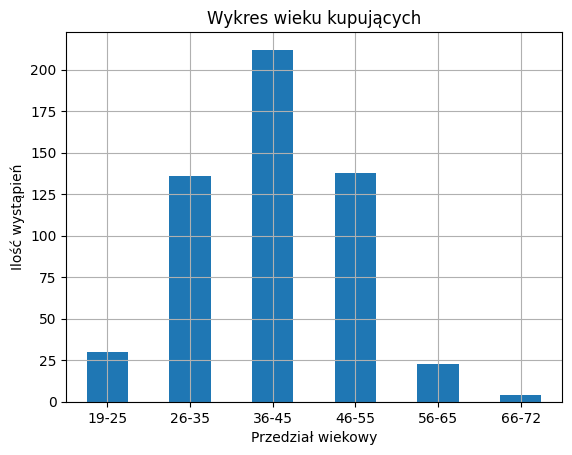

In [141]:
df_age = df['Wiek kupującego']

print(f'Minimalny wiek kupującego {min(df_age)}')
print(f'Maksymalny wiek kupującegp {max(df_age)}')

df_age['Przedział wieku'] = pd.cut(df_age, [18, 25, 35, 45, 55, 65, 72],
 labels=['19-25', '26-35', '36-45', '46-55', '56-65', '66-72'])

df_age_save = df_age['Przedział wieku'].to_frame()
df_age_save = df_age.groupby('Przedział wieku').size()

plot_age = df_age_save.plot.bar(title='Wykres wieku kupujących', rot=0,
 xlabel='Przedział wiekowy', ylabel='Ilość wystąpień', grid=True)

fig = plot_age.get_figure()
fig.savefig('../Analysis Data/Wykres_wieku_kupujących.png')

#### Uporządkowanie danych z płciami kupujących:

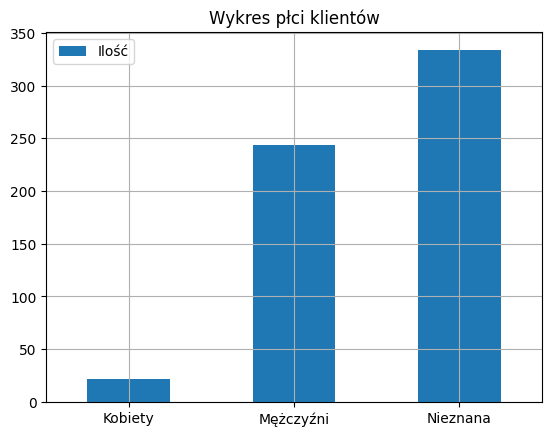

In [142]:
female_count = df['Płeć kupującego'].value_counts()['K']
male_count = df['Płeć kupującego'].value_counts()['M']
unknown_count = df['Płeć kupującego'].value_counts()['bd.']

df_sex = pd.DataFrame({'Płeć': ['Kobiety', 'Mężczyźni', 'Nieznana'],
        'Ilość': [female_count, male_count, unknown_count]})

ax = df_sex.plot.bar(x='Płeć', y='Ilość', rot=0, grid=True, title='Wykres płci klientów', xlabel='')

fig = ax.get_figure()
fig.savefig('../Analysis Data/Wykres_płci_kupujących.png')